<a href="https://colab.research.google.com/github/mahdi943/VGG16-PredictionTime/blob/master/Time-Analyses-VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# load the model
model = VGG16()


553476096/553467096 [==============================] - 3s 0us/step


In [3]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [133]:
folder = '/content/drive/MyDrive/Mahdi PhD/Papers/Code/images/'

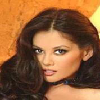

In [136]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
import random

i = random.randint(2,97)
j = random.randint(0,3)
category = ['car', 'catDog','humanFace','apparels']
categoryImagePath =[]
for item in category:
  path = folder + item + '/'
  categoryImagePath.append(path)

filename = folder + category[j] +'/image- (' + str(i+1) + ').jpg'
img = image.load_img(filename,color_mode='rgb', target_size=(100, 100, 3))
display(img)  



# Load image and predict

Measuring prediction time and save in a txt file

In [138]:
runNum = 5

In [139]:
import time
import statistics

for item in category:
  txtPredictFilePath = '/content/drive/MyDrive/Mahdi PhD/Papers/Code/Result/'+ str(runNum)+'_Run/p'+item+'.txt'
  txtAveFilePath = '/content/drive/MyDrive/Mahdi PhD/Papers/Code/Result/'+ str(runNum)+'_Run/'+item+'.txt'
  item.index
  
  predictTimeFile = open(txtPredictFilePath, 'w')
  aveFile = open(txtAveFilePath, 'w')

  imageSize = []
  ave = []

  for i in range(100):
    predictTime = []
    filename = folder + item + '/image- (' + str(i+1) + ').jpg'
    image = load_img(filename, target_size=(224, 224,3))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)

    for j in range(30):
      # predict the probability across all output classes
      start_time = time.time()
      yhat = model.predict(image)
      end_time = round((time.time() - start_time + 0.0001),3)
      predictTime.append(end_time)

    predictTimeFile.write(str(predictTime))
    ave.append(statistics.mean(predictTime))
    imageSize.append(image.size)

    # convert the probabilities to class labels
    #label = decode_predictions(yhat)
    #print(label)
    # retrieve the most likely result, e.g. highest probability
    #label = label[0][0]
    # print the classification
    # print(i+1, '- %s (%.2f%%)' % (label[1], label[2]*100))

  aveFile.write(str(ave))
  aveFile.close()
  predictTimeFile.close()


# Ploting 
reading from text file and show as plot

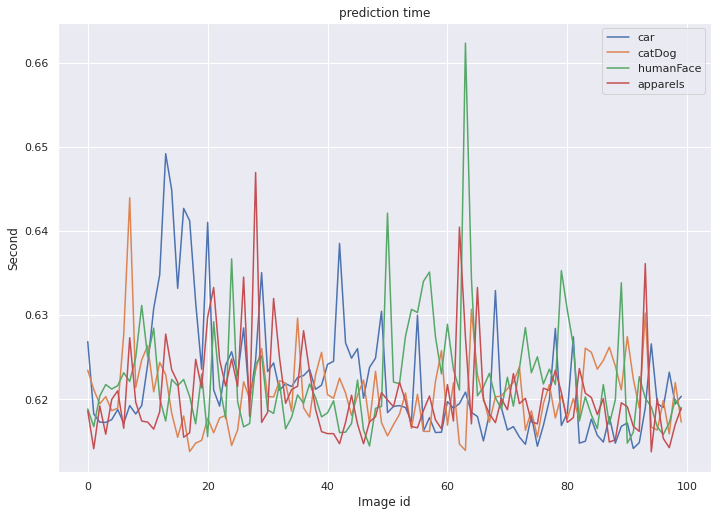

In [140]:
import os
import matplotlib.pyplot as plt


f = []
prTime = []
allTimeArr = []
txtAveFilePathList = []

for allCat in range(len(category)):
  txtPath = '/content/drive/MyDrive/Mahdi PhD/Papers/Code/Result/'+ str(runNum)+'_Run/'+category[allCat]+'.txt'
  txtAveFilePathList.append(txtPath)
  f.append(open(txtAveFilePathList[allCat],'r'))
  prTime.append(f[allCat].read())
  prTime[allCat] = prTime[allCat][1:len(prTime[allCat])-1].split(',')
  listTime =[]
  for item in prTime[allCat] :
    temp = float(item)
    listTime.append(temp)
  allTimeArr.append(listTime)
  plt.plot(listTime, label=category[allCat])
  f[allCat].close()

plt.xlabel("Image id")
plt.ylabel("Second")
plt.title('prediction time')
plt.legend()
plt.show()

#Dropping pip data



Average  car :  0.6219
Average  catDog :  0.6206
Average  humanFace :  0.6221
Average  apparels :  0.6202


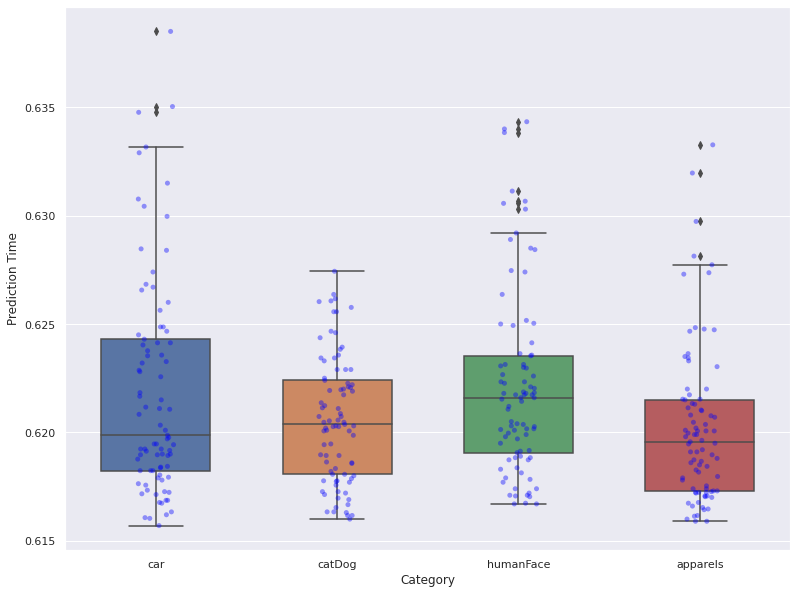

In [153]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(columns=category)

def Average(lst):
    return round((sum(lst) / len(lst)),4)
  

for allCat in range(len(category)):
  sorted = np.sort(allTimeArr[allCat])
  myData = sorted[10:95]
  # print(myData)
  print('Average ',category[allCat] ,': ' ,Average(myData))
  this_column = df.columns[allCat]
  df[this_column] = myData


data_df = df.melt(var_name='Category',value_name='Prediction Time')

sns.set(rc={'figure.figsize':(13,10)})

sns.boxplot(x = "Category",
            width=0.6,
            y = "Prediction Time",
            data = data_df)

sns.stripplot(x = "Category",
              y = "Prediction Time",
              alpha=0.4,
              color='blue',
              data = data_df)
